## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (1)

#### Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from biofes import biplot
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
sns.set(style="white") #"whitegrid", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [3]:
Daten.shape

(401, 377)

In [4]:
Daten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b2a,D-Q8b4a,D-Q8b7a,D-Q8b8a,D-Q8b10a_7,D-Q8b11a,D-Q8b17a,D-Q8b18a,D-Q8b19a,D-Q8b22a
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

#### Untergruppen und Listen für die Analyse

In [6]:
Daten_A3 = Daten[Daten['A-Q3_27'] >= 1]

In [7]:
Daten_A3.shape

(396, 377)

In [8]:
Finished = Daten[Daten['C-Q1_7'] >= 1]

In [9]:
Finished.shape

(391, 377)

In [10]:
Hauptstudie = Daten[Daten['pilot']!=1]

In [11]:
Hauptstudie_A3 = Hauptstudie[Hauptstudie['A-Q3_27'] >= 1]

In [12]:
Hauptstudie_fin = Hauptstudie[Hauptstudie['C-Q1_7'] >= 1]

Item-Listen erstellen:

In [13]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [14]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [15]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

In [16]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [17]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

### Cronbach's Alpha berechnen

In [18]:
CronbachAlpha(Hauptstudie[Liste_A_Q2])

0.27143564250330227

In [19]:
CronbachAlpha(Daten[Liste_A_Q2])

0.3018915225555093

In [20]:
CronbachAlpha(Hauptstudie_A3[Liste_A_Q3])

0.883768307699594

In [21]:
CronbachAlpha(Daten_A3[Liste_A_Q3])

0.8845773413596196

In [22]:
CronbachAlpha(Hauptstudie_fin[Liste_C_Q1])

0.4922372666891664

In [23]:
CronbachAlpha(Finished[Liste_C_Q1])

0.4896684535094027

In [24]:
CronbachAlpha(Hauptstudie[Liste_AC_Q])

0.9045546881651827

In [25]:
CronbachAlpha(Daten[Liste_AC_Q])

0.918340317521501

### Zeitanalyse

In [26]:
Hauptstudie[(Hauptstudie['Finished']==1)&(Hauptstudie['IPAddress']!='2.154.100.40')].shape

(259, 377)

Für die Berechnung der Bearbeitungszeit der Online-Befragung dürfen nur die fertig ausgefüllten Fragebögen berücksichtigt werden. Zudem sind die von der Papier-Version übertragenen Daten von dieser Analyse auszuschließen.

In [27]:
Dur = pd.to_numeric(Hauptstudie[(Hauptstudie['Finished']==1)&(Hauptstudie['IPAddress']!='2.154.100.40')]['Duration (in seconds)'])

In [28]:
Dur.describe()

count       259.000000
mean       5386.208494
std       36137.409761
min         354.000000
25%         974.500000
50%        1228.000000
75%        1558.500000
max      535186.000000
Name: Duration (in seconds), dtype: float64

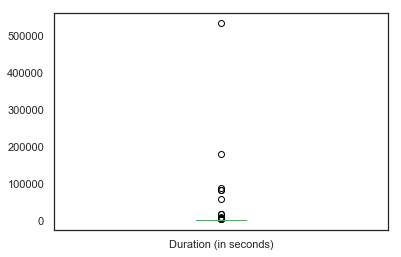

In [29]:
Dur.plot.box();

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyer zu erkennen (Outlyer, z.B. TN, die die Befragung an einem Tag begonnen und später beendet haben, sollen für die Berechnung der Bearbeitungszeit nicht berücksichtigt werden.)

Sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen.

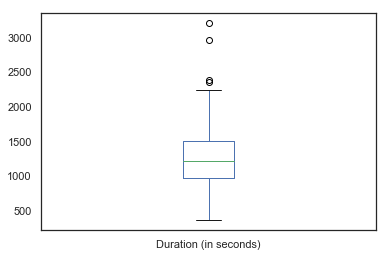

In [30]:
Dur[Dur < 4000].plot.box();

In [31]:
Dur[Dur < 4000].describe()

count     248.000000
mean     1265.516129
std       441.346917
min       354.000000
25%       960.000000
50%      1219.000000
75%      1509.500000
max      3215.000000
Name: Duration (in seconds), dtype: float64

In [32]:
(Dur[Dur < 4000].mean())/60

21.091935483870966

In [33]:
(Dur[Dur < 4000].min())/60

5.9

In [34]:
(Dur[Dur < 4000].std())/60

7.355781946374189

Schlussfolgerung:

Die durchschnittliche Beantwortungszeit liegt bei ca. 21 min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... aufgewendet wurde.

### Analyse der Strategiennutzung

#### A-Q2 (7 Hauptbereiche)

1
Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna.

2
Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas.

3
Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. 

4
Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto.

5
Pido ayuda a mi profesor/a.

6
Pido ayuda a mis compañeros/as de clase.

7
Consulto un diccionario u otra fuente (en papel o digital).


In [35]:
Df_A2 = pd.DataFrame(Daten[Liste_A_Q2].describe())
Df_A2.T

,count,mean,std,min,25%,50%,75%,max
A-Q2_1,401.0,2.528678,1.083882,1.0,2.0,3.0,3.0,5.0
A-Q2_2,401.0,3.553616,0.847197,1.0,3.0,4.0,4.0,5.0
A-Q2_3,401.0,3.865337,0.962715,1.0,3.0,4.0,5.0,5.0
A-Q2_4,401.0,4.067332,0.986385,1.0,3.0,4.0,5.0,5.0
A-Q2_5,401.0,3.431421,1.002951,1.0,3.0,3.0,4.0,5.0
A-Q2_6,401.0,3.229426,1.182046,1.0,2.0,3.0,4.0,5.0
A-Q2_7,401.0,4.301746,0.875341,1.0,4.0,5.0,5.0,5.0


In [38]:
Daten[Liste_A_Q2].mode().T

,0
A-Q2_1,3
A-Q2_2,4
A-Q2_3,4
A-Q2_4,5
A-Q2_5,4
A-Q2_6,4
A-Q2_7,5


In [39]:
Daten[Liste_A_Q2].median().T

A-Q2_1    3.0
A-Q2_2    4.0
A-Q2_3    4.0
A-Q2_4    4.0
A-Q2_5    3.0
A-Q2_6    3.0
A-Q2_7    5.0
dtype: float64

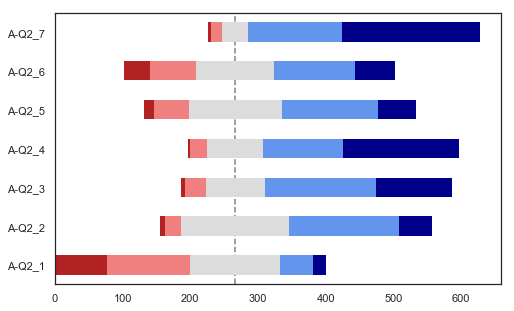

In [36]:
graf_likert(Daten,Liste_A_Q2,5)

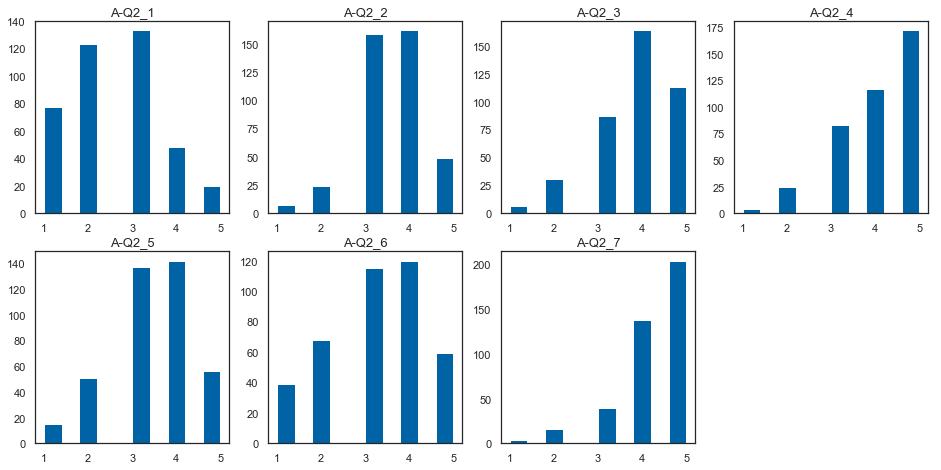

In [37]:
graf_hist(Daten,Liste_A_Q2,16,12,3,4)

In [40]:
Daten[Liste_A_Q2].mean().sort_values(ascending = False)

A-Q2_7    4.301746
A-Q2_4    4.067332
A-Q2_3    3.865337
A-Q2_2    3.553616
A-Q2_5    3.431421
A-Q2_6    3.229426
A-Q2_1    2.528678
dtype: float64

Übersicht über Häufigkeit der gewählten Antworten:

In [41]:
AQ2_Lk = Daten[Liste_A_Q2].T.apply(pd.value_counts).fillna(0).astype(integer)
AQ2_Lk = AQ2_Lk.T

In [42]:
AQ2_Lk.describe()

,1,2,3,4,5
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,0.379052,0.842893,1.877805,2.221945,1.678304
std,0.592419,0.841282,1.160832,1.266143,1.228313
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,7.000000,6.000000,6.000000


In [43]:
Score_A2 = []
for i in Daten.index:
    Score_A2.append(sum(Daten[Liste_A_Q2].loc[i]))

In [44]:
Daten['Score_A2'] = Score_A2

In [45]:
Daten['Score_A2'].describe()

count    401.000000
mean      24.977556
std        3.064636
min       15.000000
25%       23.000000
50%       25.000000
75%       27.000000
max       34.000000
Name: Score_A2, dtype: float64

##### Korrelation in A-Q2

In [46]:
Korr_A_Q2 = Daten[Liste_A_Q2].corr(method = 'spearman')
Korr_A_Q2 = Korr_A_Q2.style.applymap(lambda x: 'background-color : salmon' if abs(x) > 0.5 
                           else 'background-color: lightsalmon' if abs(x) > 0.3 and abs(x) <= 0.5
                           else 'background-color: peachpuff' if abs(x) > 0.1 and abs(x) <= 0.3
                           else 'background-color : white')
Korr_A_Q2

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,1,0.297221,0.0690837,0.0545192,-0.0723705,-0.0595766,-0.112656
A-Q2_2,0.297221,1,0.263749,0.17788,-0.0133953,-0.0910972,-0.179569
A-Q2_3,0.0690837,0.263749,1,0.497669,-0.0826049,-0.161562,0.0951848
A-Q2_4,0.0545192,0.17788,0.497669,1,-0.0562487,-0.112454,0.0580161
A-Q2_5,-0.0723705,-0.0133953,-0.0826049,-0.0562487,1,0.476382,0.0974701
A-Q2_6,-0.0595766,-0.0910972,-0.161562,-0.112454,0.476382,1,0.0994108
A-Q2_7,-0.112656,-0.179569,0.0951848,0.0580161,0.0974701,0.0994108,1


In [47]:
corr, pv = stats.spearmanr(Daten[Liste_A_Q2])
df = pd.DataFrame(pv)
df.columns = Korr_A_Q2.columns
df.index = Korr_A_Q2.index
df = df.style.applymap(lambda x: 'background-color : salmon' if abs(x) < 0.01 
                           else 'background-color: lightsalmon' if abs(x) < 0.05 and abs(x) >= 0.01
                           else 'background-color : white')
df

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,0,1.27122e-09,0.167361,0.276089,0.148011,0.233907,0.0240661
A-Q2_2,1.27122e-09,0,8.30887e-08,0.000344237,0.78915,0.0684071,0.000301451
A-Q2_3,0.167361,8.30887e-08,0,1.75365e-26,0.098571,0.00116825,0.0568517
A-Q2_4,0.276089,0.000344237,1.75365e-26,0,0.261118,0.0243219,0.246407
A-Q2_5,0.148011,0.78915,0.098571,0.261118,0,4.15142e-24,0.0511296
A-Q2_6,0.233907,0.0684071,0.00116825,0.0243219,4.15142e-24,0,0.0466553
A-Q2_7,0.0240661,0.000301451,0.0568517,0.246407,0.0511296,0.0466553,0


##### Biplot und Cluster-Analyse

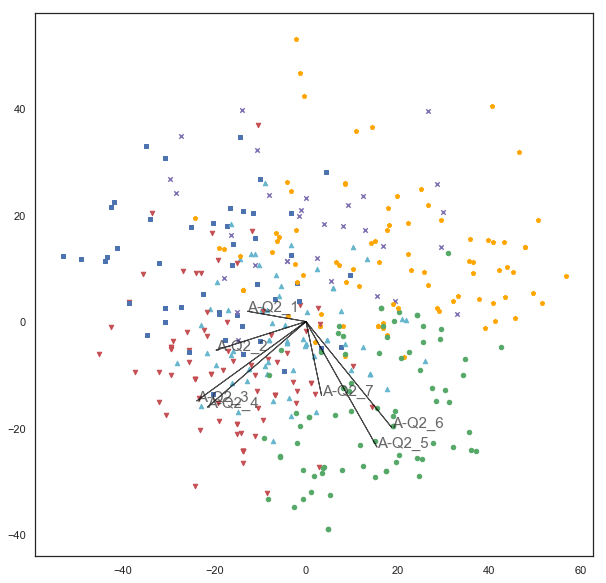

In [48]:
graf_cplot(Daten[Liste_A_Q2],6,6)

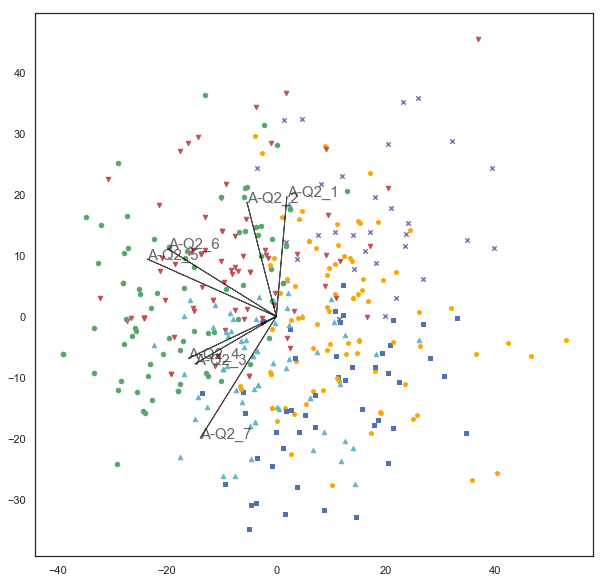

In [49]:
graf_cplot(Daten[Liste_A_Q2],6,6,1,2)

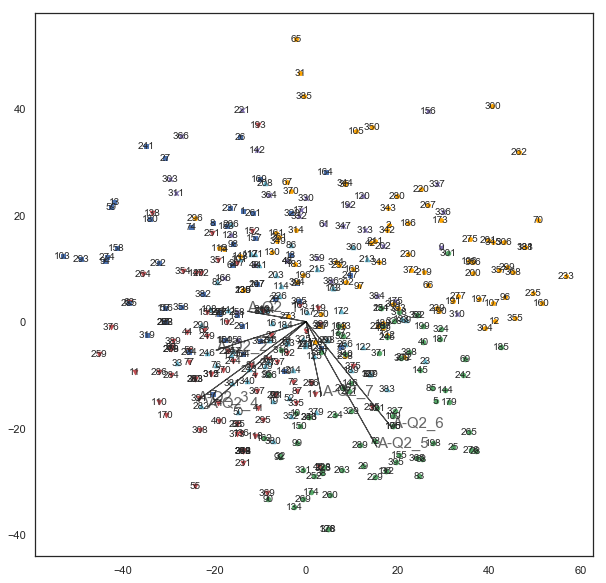

In [50]:
graf_cplot_text(Daten[Liste_A_Q2],6,6)

In [51]:
Daten[Liste_A_Q2].loc[156]

A-Q2_1    3
A-Q2_2    3
A-Q2_3    2
A-Q2_4    2
A-Q2_5    3
A-Q2_6    3
A-Q2_7    2
Name: 156, dtype: int64

#### A-Q3 (31 Einzelstrategien)

1	Ich vergleiche unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in meiner Muttersprache.

2	Ich vergleiche unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in Englisch.
z.B. dt. Licht - engl. light (span. luz).

3	Ich vergleiche unbekannte deutsche Wörter mit gleich oder ähnlich geschriebenen Wörtern in einer anderen Sprache.

4	Ich spreche mir unbekannte deutsche Wörter leise vor oder stelle mir ihren Klang vor, um gleich oder ähnlich klingende Wörter in meiner Muttersprache oder einer anderen Sprache zu finden.
z.B. dt. Haus - engl. house (span. casa).

5	Ich nutze mein Wissen über Lautentsprechungen zwischen Deutsch und anderen (germanischen) Sprachen und/oder über die historische Entwicklung der deutschen Sprache. 
z.B. engl. d - dt. t: garden – Garten (jardín), day - Tag (día), p – f: hope – hoffen (esperar), sheep - Schaf (oveja), ship - Schiff (barco)

6	Ich nutze mein Wissen über die Wortbildungsregeln des Deutschen (z.B. Komposita, typische Endungen für bestimmte Wortarten). 
z.B. fahren = Verb (Tätigkeit), der Fahrer = Person, die fährt (allgemein/männlich), die Fahrerin = Person, die fährt (weiblich), der Autofahrer = Auto + Fahrer = Fahrer eines Autos. 

7	Ich nutze mein Wissen über die Teilbedeutung zusammengesetzter Wörter, z.B. Stamm, Prä- und Suffixe oder Teile von Komposita, um die Gesamtbedeutung zu erschließen. 
z.B. Mopedfahrer -> erstes Teilwort ist ein Fahrzeug, ungenau -> Präfix un- bedeutet oft „Gegenteil“, genau -> ungenau. 

8	Ich nutze mein Wissen über Bestandteile von Wörtern, die grammatische Funktionen anzeigen, z.B. Plural- oder Kasusmarkierungen für Substantive, typische Endungen von Verben in verschiedenen Zeitformen/Tempora. 
z.B. gefahren, gelernt -> Partizipien (Wortart: Verb); schöner, reicher -> Steigerungsform Komparativ (Wortart Adjektiv).

9	Ich nutze mein Wissen über orthografische Regeln des Deutschen, z.B. Großschreibung der Substantive, Bindestriche in zusammengesetzten Wörtern, Punkt oder Komma als Strukturierungshilfen.

28	Wenn ich denke, dass ich ein unbekanntes Wort aufgrund seiner Form oder seines Klanges verstehen kann, kontrolliere ich meine Vermutung, indem ich den näheren Kontext (d. h. den Satz oder Teilsatz) miteinbeziehe.

10	Ich nutze mein Wissen über die Satzstellung im Deutschen, z.B. Personalform des Verbes an zweiter Position im Satz, Verbal/Satzklammer etc., um etwas über unbekannte Wörter herauszufinden.

11	Ich analysiere den grammatikalischen Aufbau des (Teil-)Satzes, um Verbindungen zwischen bekannten und unbekannten Wörtern zu finden.

12	Ich analysiere die semantischen Beziehungen zwischen bekannten und unbekannten Wörtern.

13	Ich beachte systematische lexikalische Beziehungen wie Synonyme, Antonyme, Reihungen, Über- und Unterbegriffe.

29	Wenn ich denke, dass ich ein unbekanntes Wort in einem (Teil-)Satz verstehen kann, kontrolliere ich meine Vermutung, indem ich den weiteren Kontext (d.h. vorherige und folgende Sätze, Absatz, Gesamttext) miteinbeziehe.

14	Ich beachte die Verwendung von Konnektoren und anderen Mitteln der Textverbindung wie Pronomen, Adverbien etc. 
z.B. weil, auch, diese

15	Ich nutze Erklärungshilfen im Text wie Paraphrasen, Definitionen, Erklärungen, Beispiele etc., die das unbekannte Wort umschreiben oder erklären.

16	Ich nutze logische Zusammenhänge im Text, z.B. Ursache – Wirkung oder vorher – nachher.

17	Ich nutze mein Wissen über die Textsorte.

18	Ich nutze mein Wissen über das im Text behandelte Thema.

19	Ich nutze kulturspezifisches und landeskundliches Wissen, z.B. Namen berühmter Persönlichkeiten, geographische oder politische Informationen.

20	Ich nutze meinen gesunden Menschenverstand und mein allgemeines Weltwissen.

21	Ich achte auf die visuelle Textgestalt, z.B. Anordnung der Elemente, Schriftart und –größe, Hervorhebungen.

22	Ich nutze Bilder, Grafiken, Diagramme, audiovisuelle Elemente (auf Websites), etc.

23	Ich achte auf Zahlen oder andere Zeichen, die ich verstehe.

24	Ich nutze mein Wissen über die Kommunikationssituation oder den Kontext der Veröffentlichung, z.B. Ort, Zeit, Situation, wo ich einen Text gefunden habe.

25	Ich nutze Hyperlinks beim Erschließen von unbekannten Wörtern in Texten im Internet.

30	Wenn es mir nicht gelingt, ein unbekanntes Wort in einem Text zu erschließen, lese ich zunächst weiter und versuche es später noch einmal.

31	Wenn es mir nicht sofort gelingt, eine sinnvolle Wortbedeutung zu erschließen, überlege ich, welche weiteren Strategien ich anwenden kann.

26	Ich nutze verschiedene Strategien, um die Erschließung unbekannter Wörter abzusichern.

27	Je nach Situation, z.B. Textsorte oder Schwierigkeitsgrad der Texte, wende ich unterschiedliche Strategien zur Erschließung unbekannter Wörter an.


In [52]:
Df_A3t = Daten_A3[Liste_A_Q3]
Df_A3t = Df_A3t.replace(0,np.nan)
Df_A3 = pd.DataFrame(Df_A3t.describe())
Df_A3.T

,count,mean,std,min,25%,50%,75%,max
A-Q3_1,396.0,3.055556,1.208386,1.0,2.00,3.0,4.0,5.0
A-Q3_2,395.0,3.977215,0.943580,1.0,3.00,4.0,5.0,5.0
A-Q3_3,394.0,2.992386,1.327893,1.0,2.00,3.0,4.0,5.0
A-Q3_4,396.0,2.924242,1.183994,1.0,2.00,3.0,4.0,5.0
A-Q3_5,396.0,2.575758,1.237318,1.0,2.00,2.0,4.0,5.0
A-Q3_6,396.0,3.747475,1.087032,1.0,3.00,4.0,5.0,5.0
A-Q3_7,396.0,3.568182,1.146441,1.0,3.00,4.0,4.0,5.0
A-Q3_8,396.0,3.633838,1.166957,1.0,3.00,4.0,5.0,5.0
A-Q3_9,396.0,3.957071,1.048531,1.0,3.00,4.0,5.0,5.0
A-Q3_28,396.0,3.792929,1.044601,1.0,3.00,4.0,5.0,5.0


In [58]:
Daten_A3[Liste_A_Q3].median()

A-Q3_1     3.0
A-Q3_2     4.0
A-Q3_3     3.0
A-Q3_4     3.0
A-Q3_5     2.0
A-Q3_6     4.0
A-Q3_7     4.0
A-Q3_8     4.0
A-Q3_9     4.0
A-Q3_28    4.0
A-Q3_10    3.0
A-Q3_11    3.0
A-Q3_12    3.0
A-Q3_13    3.0
A-Q3_29    4.0
A-Q3_14    4.0
A-Q3_15    4.0
A-Q3_16    3.0
A-Q3_17    3.0
A-Q3_18    4.0
A-Q3_19    4.0
A-Q3_20    4.0
A-Q3_21    3.0
A-Q3_22    4.0
A-Q3_23    4.0
A-Q3_24    3.0
A-Q3_25    4.0
A-Q3_30    4.0
A-Q3_31    4.0
A-Q3_26    4.0
A-Q3_27    4.0
dtype: float64

In [59]:
Daten_A3[Liste_A_Q3].mode().T

,0
A-Q3_1,3
A-Q3_2,4
A-Q3_3,3
A-Q3_4,3
A-Q3_5,2
A-Q3_6,4
A-Q3_7,4
A-Q3_8,4
A-Q3_9,5
A-Q3_28,4


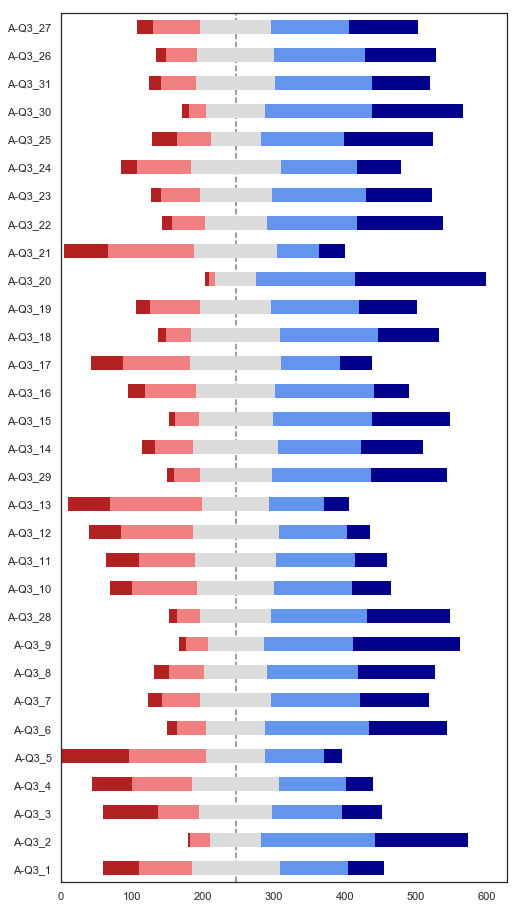

In [53]:
graf_likert(Daten_A3,Liste_A_Q3,16)

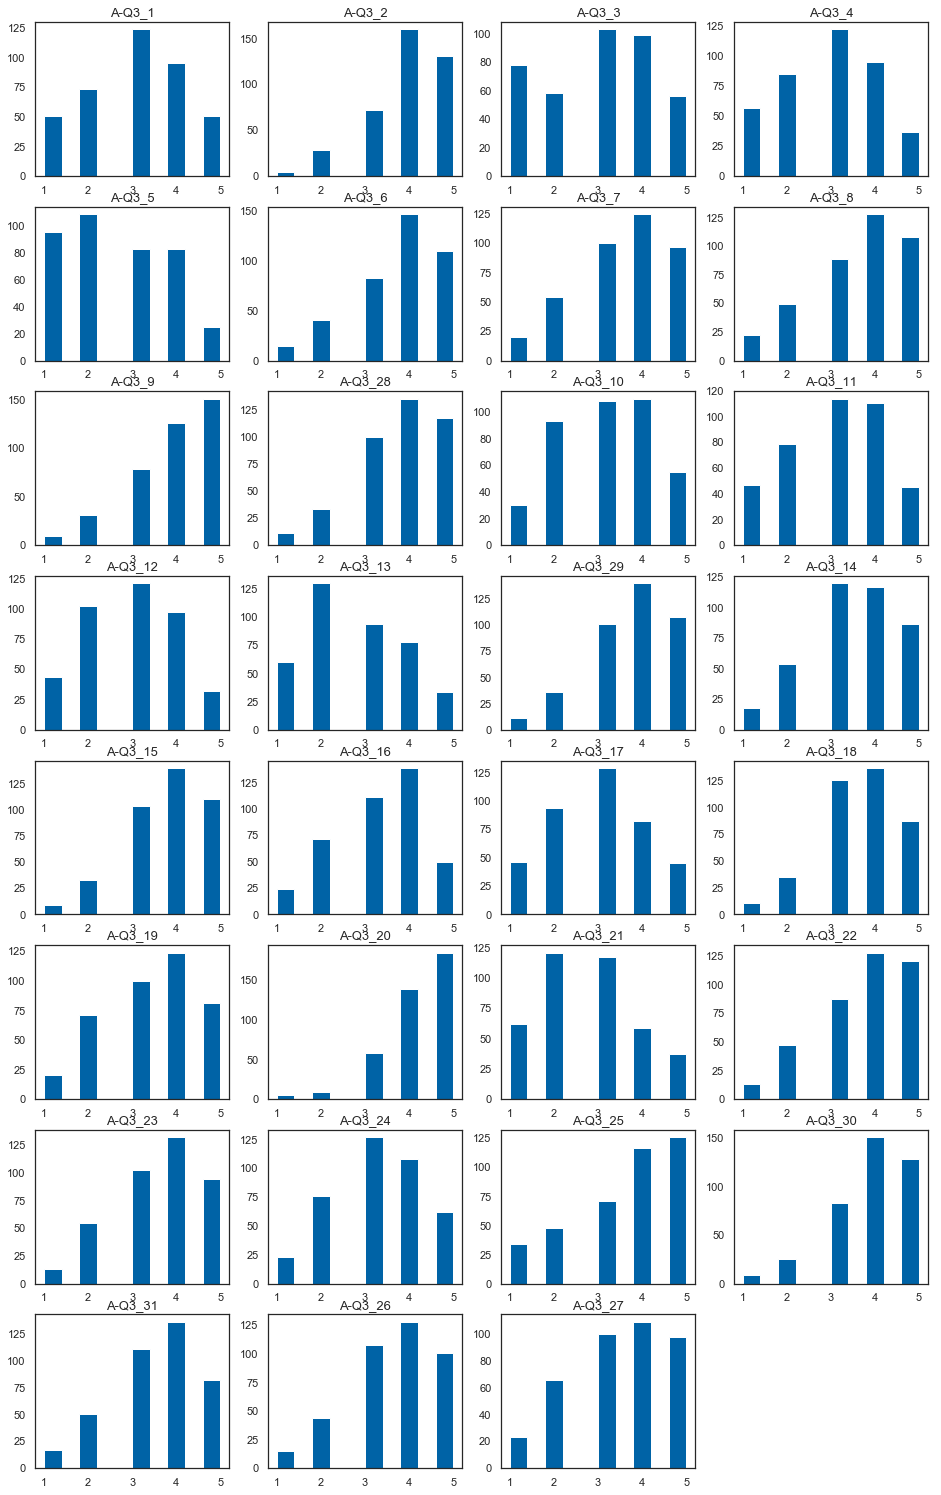

In [54]:
graf_hist(Daten_A3,Liste_A_Q3,16,30,9,4)

In [60]:
Daten_A3[Liste_A_Q3].mean().sort_values(ascending = False)

A-Q3_20    4.237374
A-Q3_2     3.967172
A-Q3_9     3.957071
A-Q3_30    3.919192
A-Q3_28    3.792929
A-Q3_15    3.780303
A-Q3_29    3.752525
A-Q3_22    3.750000
A-Q3_6     3.747475
A-Q3_26    3.646465
A-Q3_18    3.641414
A-Q3_25    3.638889
A-Q3_8     3.633838
A-Q3_23    3.603535
A-Q3_7     3.568182
A-Q3_31    3.545455
A-Q3_14    3.507576
A-Q3_27    3.487374
A-Q3_19    3.441919
A-Q3_16    3.300505
A-Q3_24    3.277778
A-Q3_10    3.169192
A-Q3_11    3.070707
A-Q3_1     3.055556
A-Q3_3     2.977273
A-Q3_17    2.964646
A-Q3_12    2.926768
A-Q3_4     2.924242
A-Q3_13    2.737374
A-Q3_21    2.717172
A-Q3_5     2.575758
dtype: float64

In [62]:
Daten_A3[Liste_A_Q3].std().sort_values()

A-Q3_20    0.873936
A-Q3_2     0.963345
A-Q3_30    0.992904
A-Q3_18    1.007668
A-Q3_15    1.016181
A-Q3_29    1.040627
A-Q3_28    1.044601
A-Q3_9     1.048531
A-Q3_31    1.084041
A-Q3_6     1.087032
A-Q3_26    1.091399
A-Q3_23    1.091689
A-Q3_16    1.092251
A-Q3_22    1.111790
A-Q3_14    1.112617
A-Q3_24    1.117688
A-Q3_12    1.126073
A-Q3_7     1.146441
A-Q3_19    1.149204
A-Q3_10    1.160166
A-Q3_8     1.166957
A-Q3_17    1.168690
A-Q3_21    1.173897
A-Q3_4     1.183994
A-Q3_11    1.186443
A-Q3_13    1.187154
A-Q3_27    1.195918
A-Q3_1     1.208386
A-Q3_5     1.237318
A-Q3_25    1.276230
A-Q3_3     1.341448
dtype: float64

In [55]:
Daten_A3[Daten_A3['A-Q3_3_TEXT']!=0]['A-Q3_3'].describe()

count    272.000000
mean       3.584559
std        0.994552
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: A-Q3_3, dtype: float64

In [56]:
Daten_A3[Daten_A3['A-Q3_3_TEXT']!=0]['A-Q3_3'].median()

4.0

In [57]:
Daten_A3['A-Q3_3_TEXT'].value_counts()

0                                                                                  124
Francés                                                                             24
Inglés                                                                              24
Inglés                                                                              21
francés                                                                             18
inglés                                                                              17
Francés                                                                              7
latín                                                                                4
inglés, francés                                                                      4
neerlandés                                                                           4
Inglés, francés                                                                      4
español                                    

In [61]:
get_name_glossind(gloss,'A-Q3_20')

(47, 'A-Q3 - Utilizo el sentido común y mis conocimientos generales.')

Korrelation in A-Q3:

In [63]:
Korr_A_Q3 = Daten[Liste_A_Q3].corr(method = 'spearman')
Korr_A_Q3.to_excel('D:\Daten\DISS\Korr_AQ3.xlsx')
Korr_A_Q3 = Korr_A_Q3.style.applymap(lambda x: 'background-color : salmon' if abs(x) > 0.5 
                           else 'background-color: lightsalmon' if abs(x) > 0.3 and abs(x) <= 0.5
                           else 'background-color: peachpuff' if abs(x) > 0.1 and abs(x) <= 0.3
                           else 'background-color : white')
Korr_A_Q3

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,A-Q3_10,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_29,A-Q3_14,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
A-Q3_1,1,0.364282,0.290403,0.185472,0.232093,0.0509879,0.0345282,0.0125075,0.0475972,0.0674412,0.0732063,0.108969,0.0742346,0.110563,0.00456301,-0.0306966,-0.013599,-0.044243,0.164835,0.152897,0.141468,0.171385,0.0411164,0.0555242,0.0273309,0.077014,0.0362418,0.0550528,0.0814445,0.136283,0.0418519
A-Q3_2,0.364282,1,0.343613,0.314918,0.277589,0.1935,0.162006,0.0968522,0.120442,0.188502,0.0270303,0.019715,0.0477854,-0.0308221,0.114443,0.0561356,0.141425,0.0657891,0.112874,0.166212,0.232035,0.226381,0.00868908,0.141184,0.0946482,0.179656,0.0863155,0.161002,0.0825318,0.248455,0.14364
A-Q3_3,0.290403,0.343613,1,0.271513,0.201424,0.0658832,0.051998,0.00526106,0.071572,0.111703,-0.00575153,0.0234521,0.0548131,0.0857966,0.0219651,0.0744723,0.0862349,0.056338,0.160311,0.176366,0.161379,0.133433,0.125302,0.142452,0.103695,0.209123,0.0539992,0.0399856,0.133325,0.18491,0.130346
A-Q3_4,0.185472,0.314918,0.271513,1,0.318921,0.0795568,0.0692522,0.011408,0.0887301,0.120543,0.0438577,0.12,0.0747298,0.0831697,0.0803385,0.055034,0.0699204,0.0887059,0.1206,0.0593487,0.112911,0.0786248,0.191893,0.164195,0.149864,0.150632,0.108528,0.14775,0.101442,0.147245,0.188189
A-Q3_5,0.232093,0.277589,0.201424,0.318921,1,0.310289,0.258803,0.212166,0.21281,0.197106,0.240021,0.267343,0.283867,0.268038,0.187708,0.196666,0.207207,0.176869,0.266751,0.178498,0.172864,0.182775,0.247786,0.102416,0.136863,0.214322,0.141591,0.120332,0.143992,0.217153,0.211969
A-Q3_6,0.0509879,0.1935,0.0658832,0.0795568,0.310289,1,0.743077,0.668302,0.449006,0.285901,0.402291,0.335969,0.340308,0.247515,0.252363,0.379934,0.319313,0.234741,0.179881,0.262747,0.203551,0.308809,0.112804,0.0797806,0.126571,0.166987,0.094243,0.221933,0.0911715,0.232571,0.19623
A-Q3_7,0.0345282,0.162006,0.051998,0.0692522,0.258803,0.743077,1,0.735329,0.460834,0.295465,0.443672,0.373259,0.387152,0.261309,0.270129,0.403884,0.364113,0.307901,0.226959,0.279968,0.23964,0.305829,0.141022,0.12507,0.133995,0.164226,0.134922,0.25078,0.174132,0.279959,0.198276
A-Q3_8,0.0125075,0.0968522,0.00526106,0.011408,0.212166,0.668302,0.735329,1,0.562665,0.304316,0.453421,0.379397,0.342811,0.258957,0.290021,0.411755,0.342408,0.308849,0.200553,0.251879,0.268439,0.318795,0.185788,0.123876,0.160286,0.208898,0.120373,0.261186,0.148848,0.246448,0.229294
A-Q3_9,0.0475972,0.120442,0.071572,0.0887301,0.21281,0.449006,0.460834,0.562665,1,0.28571,0.40034,0.294808,0.291772,0.183677,0.271962,0.334901,0.382382,0.191316,0.17478,0.205515,0.276246,0.264695,0.171185,0.105289,0.191977,0.180037,0.120051,0.236709,0.17127,0.221157,0.219663
A-Q3_28,0.0674412,0.188502,0.111703,0.120543,0.197106,0.285901,0.295465,0.304316,0.28571,1,0.295606,0.28926,0.350537,0.212328,0.457338,0.260016,0.289544,0.264475,0.189597,0.322822,0.262204,0.373719,0.0662748,0.202382,0.212243,0.210951,0.0816717,0.232567,0.304866,0.360952,0.208224


In [64]:
corr, pv = stats.spearmanr(Daten_A3[Liste_A_Q3])
df = pd.DataFrame(pv)
df.columns = Korr_A_Q3.columns
df.index = Korr_A_Q3.index
df = df.style.applymap(lambda x: 'background-color : salmon' if abs(x) < 0.01 
                           else 'background-color: lightsalmon' if abs(x) < 0.05 and abs(x) >= 0.01
                           else 'background-color : white')
df

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,A-Q3_10,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_29,A-Q3_14,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
A-Q3_1,0,1.45099e-12,1.87813e-08,0.000867966,9.88053e-06,0.502584,0.749115,0.894269,0.628627,0.432018,0.255133,0.0614929,0.248348,0.0574381,0.611724,0.30914,0.481778,0.202625,0.002958,0.00670261,0.0141063,0.00171273,0.622079,0.431961,0.835282,0.218053,0.69536,0.439375,0.186736,0.0140408,0.611444
A-Q3_2,1.45099e-12,0,1.22116e-11,8.12895e-10,1.17225e-07,0.000330314,0.00442389,0.139146,0.0614297,0.00135155,0.95762,0.919585,0.632605,0.253437,0.0967939,0.526788,0.0182565,0.396094,0.0756768,0.00416927,2.29591e-05,3.19598e-05,0.7543,0.0156294,0.14584,0.0012618,0.198563,0.00468703,0.228433,2.84211e-06,0.0133739
A-Q3_3,1.87813e-08,1.22116e-11,0,2.62696e-07,0.000302065,0.416329,0.592074,0.670759,0.329231,0.0631984,0.509393,0.952209,0.56264,0.223481,0.985151,0.321637,0.213633,0.548032,0.0056484,0.00185949,0.00484224,0.0288769,0.043509,0.0177057,0.115158,0.000164111,0.580664,0.794819,0.029079,0.00112109,0.0332534
A-Q3_4,0.000867966,8.12895e-10,2.62696e-07,0,3.85268e-10,0.260163,0.318289,0.867437,0.158326,0.0379252,0.611244,0.0383457,0.25456,0.187109,0.210702,0.46023,0.300082,0.153868,0.0373101,0.411397,0.0549242,0.228942,0.000343997,0.00272578,0.00696967,0.00659941,0.0655482,0.00809214,0.0906452,0.00822915,0.000464715
A-Q3_5,9.88053e-06,1.17225e-07,0.000302065,3.85268e-10,0,3.5107e-09,2.55577e-06,0.000215098,0.000157274,0.000376009,1.97102e-05,1.19818e-06,1.89357e-07,1.11879e-06,0.000784508,0.000758811,0.000305317,0.00338581,1.06802e-06,0.00254293,0.00348193,0.00227606,9.63555e-06,0.167062,0.0363016,0.000201974,0.0282746,0.0813714,0.0251962,0.000161756,0.000245077
A-Q3_6,0.502584,0.000330314,0.416329,0.260163,3.5107e-09,0,3.35214e-69,4.01637e-51,5.234e-20,2.31512e-08,1.55977e-15,9.68747e-11,5.01087e-11,5.35303e-06,1.14765e-06,8.2102e-14,8.52785e-10,2.0067e-05,0.00158378,8.89494e-07,0.000229264,4.56413e-09,0.087227,0.304964,0.0462224,0.0045791,0.184878,6.93266e-05,0.207857,2.55125e-05,0.000565337
A-Q3_7,0.749115,0.00442389,0.592074,0.318289,2.55577e-06,3.35214e-69,0,4.43769e-66,1.2476e-20,1.522e-08,1.09446e-18,6.40487e-13,6.17332e-14,2.36496e-06,3.23289e-07,3.0439e-15,2.45897e-12,1.08002e-08,5.75552e-05,2.52696e-07,1.5587e-05,1.4163e-08,0.0295585,0.0651539,0.0423267,0.00784603,0.0407451,7.73876e-06,0.00423785,3.2718e-07,0.000761719
A-Q3_8,0.894269,0.139146,0.670759,0.867437,0.000215098,4.01637e-51,4.43769e-66,0,1.38373e-32,5.71075e-09,1.67578e-19,2.7796e-13,8.92519e-11,3.3986e-06,3.39725e-08,7.99562e-16,8.3078e-11,1.08132e-08,0.000574169,5.92118e-06,8.95193e-07,3.00595e-09,0.00204404,0.0736217,0.010822,0.000360731,0.0853523,2.99494e-06,0.0210664,1.30163e-05,6.31662e-05
A-Q3_9,0.628627,0.0614297,0.329231,0.158326,0.000157274,5.234e-20,1.2476e-20,1.38373e-32,0,1.10759e-07,3.7691e-15,3.87039e-08,5.6156e-08,0.00176311,5.34753e-07,1.87301e-10,1.06474e-13,0.00102053,0.00327012,0.000348196,3.61116e-07,1.44622e-06,0.00411156,0.134604,0.000960445,0.00226144,0.071168,2.23384e-05,0.00414322,8.95477e-05,0.000100462
A-Q3_28,0.432018,0.00135155,0.0631984,0.0379252,0.000376009,2.31512e-08,1.522e-08,5.71075e-09,1.10759e-07,0,1.58048e-08,3.621e-08,6.46924e-12,0.000118236,6.98933e-20,1.22091e-06,4.95956e-08,6.58438e-07,0.000879916,6.78148e-10,1.34285e-06,1.95065e-13,0.408448,0.000251819,0.000108247,0.000121258,0.252352,1.73351e-05,4.41236e-09,1.05083e-12,0.000151397


In [65]:
get_name_glossind(gloss,'A-Q3_23')

(50, 'A-Q3 - Me fijo en cifras o en otros símbolos que entiendo.')

In [66]:
AQ3_Lk = Daten[Liste_A_Q3].T.apply(pd.value_counts).fillna(0).astype(integer)
AQ3_Lk = AQ3_Lk.T
AQ3_Lk.drop(0, axis=1, inplace=True)

In [67]:
AQ3_Lk.describe()

,1,2,3,4,5
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,2.259352,4.760599,7.867830,9.174564,6.620948
std,2.867502,3.150007,4.341081,4.277786,5.688230
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,7.000000,2.000000
50%,1.000000,4.000000,7.000000,9.000000,5.000000
75%,3.000000,7.000000,10.000000,12.000000,10.000000
max,20.000000,16.000000,25.000000,22.000000,27.000000


In [68]:
AQ3_Lk.loc[315]

1     0
2     2
3    16
4    12
5     1
Name: 315, dtype: int32

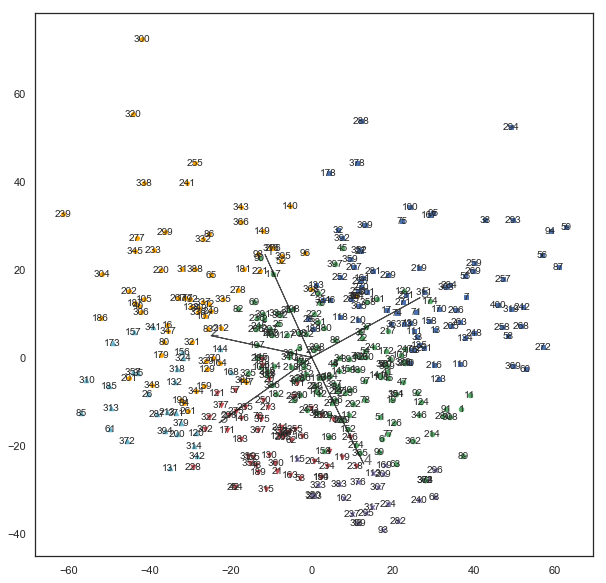

In [69]:
graf_cplot_text(AQ3_Lk,5,6)

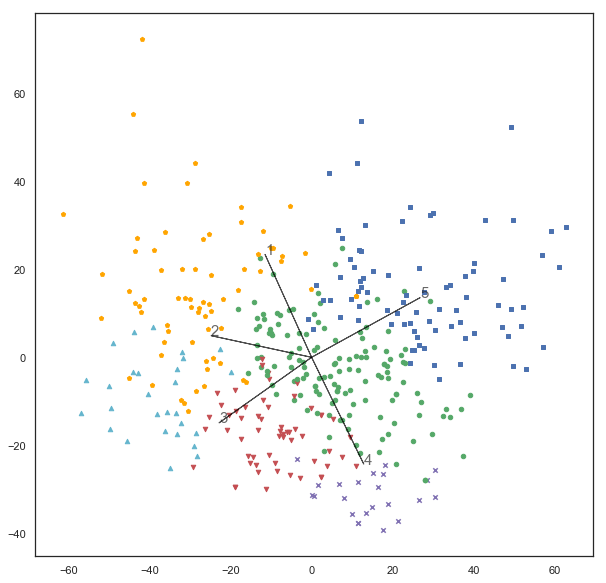

In [70]:
graf_cplot(AQ3_Lk,5,6)

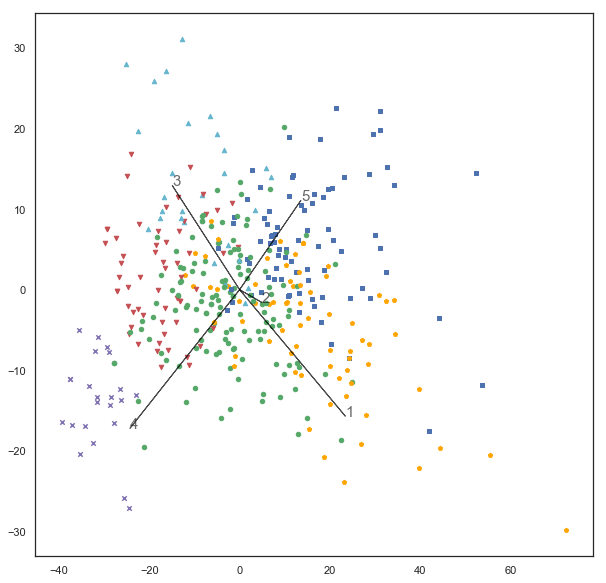

In [71]:
graf_cplot(AQ3_Lk,5,6,1,2)

In [72]:
Score = []
for i in Daten_A3.index:
    Score.append(sum(Daten_A3[Liste_A_Q3].loc[i]))
Df_Score = pd.DataFrame(Score)
Df_Score.describe()

,0
count,396.000000
mean,106.315657
std,16.475954
min,50.000000
25%,95.000000
50%,107.000000
75%,117.000000
max,151.000000


In [73]:
print('Maximal-Score: ' + str(+31*5))
print('Minimal-Score: ' + str(+31*1))

Maximal-Score: 155
Minimal-Score: 31


##### Scores nach Faktoren:

Mit den Faktorenladungen der in R durchgeführten Faktorenanalyse können Scores für die jeweiligen Faktoren ermittelt werden. Dabei werden die Werte der gewählten Antwortoptionen (1-5) mit den jeweiligen Ladungen der Items auf die betreffenen Faktoren multipliziert. ...?

In [74]:
FA_weights = pd.read_excel('D:\Daten\DISS\Daten\FA_weights.xlsx')

In [75]:
A = FA_weights.drop(FA_weights.columns[0], axis=1).values
B = Daten_A3[Liste_A_Q3].values
C = B.dot(A)
Df_C = pd.DataFrame(C, columns=FA_weights.columns[1:], index=Daten_A3[Liste_A_Q3].index)

In [76]:
Df_Cst = (Df_C - Df_C.mean())/Df_C.std()
Df_Cst.describe().T

,count,mean,std,min,25%,50%,75%,max
MR2,396.0,2.901719e-15,1.0,-2.940440,-0.643566,0.113517,0.798974,1.876732
MR4,396.0,-1.749442e-16,1.0,-2.619848,-0.641412,0.091569,0.659869,2.800882
MR1,396.0,1.530762e-16,1.0,-4.028463,-0.560624,0.063195,0.630998,2.170201
MR5,396.0,-1.536369e-16,1.0,-3.738918,-0.679604,0.034516,0.744399,2.486731
MR6,396.0,-2.454546e-16,1.0,-2.715938,-0.681387,0.079967,0.724829,2.017881
MR3,396.0,6.629097e-16,1.0,-2.940118,-0.673411,-0.005117,0.691531,2.558673


In [77]:
Df_Ct = Df_C.describe()
Df_Ct.T

,count,mean,std,min,25%,50%,75%,max
MR2,396.0,3.253724,1.035254,0.209622,2.587469,3.371243,4.080865,5.196618
MR4,396.0,1.771732,1.014218,-0.885364,1.121201,1.864604,2.440983,4.612436
MR1,396.0,2.054398,0.908293,-1.604625,1.545188,2.111798,2.627530,4.025577
MR5,396.0,3.482871,0.893274,0.142993,2.875799,3.513703,4.147824,5.704204
MR6,396.0,2.661785,0.965146,0.040507,2.004147,2.738965,3.361351,4.609336
MR3,396.0,3.415453,0.933825,0.669899,2.786605,3.410675,4.061222,5.804806


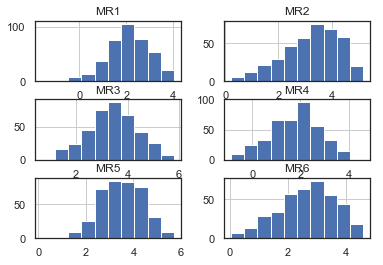

In [78]:
Df_C.hist();

##### Gruppierung der Strategien nach Kategorien:

In [79]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

In [80]:
#Berechnung der Summe der Werte, des Mittelwerts und der Anzahl an Items mit einem bestimmten Wert (individuell):
#Daten.loc[56, strat['S1']].sum()
#Daten.loc[56, strat['S1']].mean()
#(Daten.loc[56, strat['S1']] >= 5).sum()

In [81]:
#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:
#Daten[Daten[strat['S1']].mean(axis=1) >= 3]

In [82]:
#Anzahl de#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:r TN, deren Summe der Werte in S1 >= 8 ist:
#Daten[Daten[strat['S1']].sum(axis=1) >= 8].shape[0]

##### Bandbreite und Frequenz der Strategiennutzung:

In der Folge wird berechnet, wie viele TN pro Strategiengruppe mit ihren Angaben einen Durchschnittswert von 3 (Likert) aufweisen und eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben.

In [83]:
print('S1: '+str(Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 3) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S2: '+str(Daten_A3[(Daten_A3[strat['S2']].mean(axis=1) >= 3) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S3: '+str(Daten_A3[(Daten_A3[strat['S3']].mean(axis=1) >= 3) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S4: '+str(Daten_A3[(Daten_A3[strat['S4']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4)].shape[0]))
print('S4a: '+str(Daten_A3[(Daten_A3[strat['S4a']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S4b: '+str(Daten_A3[(Daten_A3[strat['S4b']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S5: '+str(Daten_A3[(Daten_A3[strat['S5']].mean(axis=1) >= 3) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2)].shape[0]))
print('S6: '+str(Daten_A3[(Daten_A3[strat['S6']].mean(axis=1) >= 3) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]))

S1: 303
S2: 237
S3: 270
S4: 311
S4a: 287
S4b: 319
S5: 303
S6: 348


Anzahl der TN pro Strategiengruppe, die eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben:

In [84]:
print('S1: '+str(Daten_A3[(Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S2: '+str(Daten_A3[(Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S3: '+str(Daten_A3[(Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S4: '+str(Daten_A3[(Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4].shape[0]))
print('S4a: '+str(Daten_A3[(Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S4b: '+str(Daten_A3[(Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S5: '+str(Daten_A3[(Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2].shape[0]))
print('S6: '+str(Daten_A3[(Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3].shape[0]))

S1: 368
S2: 367
S3: 337
S4: 363
S4a: 353
S4b: 367
S5: 368
S6: 379


Anzahl der TN, die in jeder Strategiengruppe eine Mindestanzahl an Strategien mit 3 bewertet haben:

In [85]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 2) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S2']].mean(axis=1) >= 2) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S3']].mean(axis=1) >= 2) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S4']].mean(axis=1) >= 2) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4) & (Daten_A3[strat['S5']].mean(axis=1) >= 2) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S6']].mean(axis=1) >= 2) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

256

Anzahl und Prozentsatz der TN, die eine Mindestanzahl an Strategien aus jeder Strategiengruppe mit 3 (Likert) bewertet haben:

In [86]:
def get_good_str(df):
    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [87]:
get_good_str(Daten_A3)

(260, 65.65656565656566)

#### B-Q1 (Kontexte des Strategienerwerbs)

In [88]:
Kontexte = Finished[['B-Q1_1','B-Q1_2','B-Q1_3','B-Q1_4','B-Q1_5','B-Q1_6','B-Q1_7','B-Q1_8','B-Q1_9','B-Q1_10','B-Q1_11']]

In [89]:
DF_Kontexte = Kontexte.apply(pd.value_counts).fillna(0).astype(integer)

In [90]:
DF_Kontexte.iloc[1].sort_values(ascending = False)

B-Q1_7     232
B-Q1_9     220
B-Q1_2     220
B-Q1_3     176
B-Q1_6     157
B-Q1_1     139
B-Q1_5     138
B-Q1_4     119
B-Q1_8      92
B-Q1_10     23
B-Q1_11     11
Name: 1, dtype: int32

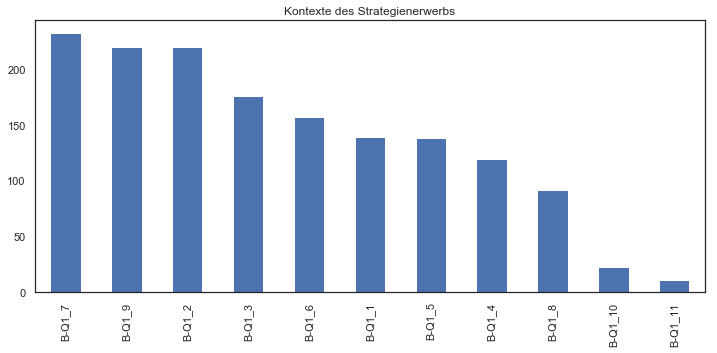

In [91]:
DF_Kontexte.iloc[1].sort_values(ascending = False).plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = False, title = "Kontexte des Strategienerwerbs");

* 1- En las clases de Lengua y Literatura en el colegio o instituto
* 2- En las clases de inglés en el colegio o instituto
* 3- En otras clases de idiomas en el colegio o instituto
* 4- En clases de alemán anteriores en la Universidad
* 5- En otras asignaturas de mi carrera universitaria
* 6- En clases de lenguas en escuelas de idiomas o academias
* 7- En mi curso de alemán actual
* 8- En mi familia, con mis amigos/as o compañeros/as de clase
* 9- Por mi cuenta, sin ayuda de otras personas
* 10- Otros:
* 11- No sé cómo he aprendido estas estrategias.

In [92]:
Finished[Finished['B-Q1_10_TEXT']!=0].shape

(23, 377)

In [93]:
Finished[Finished['B-Q1_10_TEXT']!=0]['B-Q1_10_TEXT']

13     Sentido común y uso intuitivo y automático de ...
27                                            CON MARIAN
43     leyendo sobre estrategias de aprendizaje en in...
44                            Con lecturas por Internet 
60     En otras materias que enseñaban a hacer resume...
104                               Leyendo el diccionario
141           Leyendo en otros idiomas por cuenta propia
164                               estudiar en extranjero
187    En distintas asignaturas a lo largo de todos m...
202                                   Intuición personal
206    Tengo bastante intuición con las lenguas y he ...
222                            Razonamiento comparativo 
230                        en realidad es mezcla de todo
240    En el Instituto cultural alemán (Sevilla) y en...
246    leyendo textos por mi mismo y poniendo en rela...
247    se me da bien aprender idiomas y tengo facilid...
262    convivencia con amigos bilingües (de padre nat...
293    En mi academia, pero par

#### B-Q2 (Methoden des Strategienerwerbs)

Erwerbskontexte:

In [94]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

Methoden des Stragienerwerbs (kontextübergreifend in Unterrichtssituationen):

In [95]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6'],
         'U7': ['B-Q2-1_7','B-Q2-2_7','B-Q2-3_7','B-Q2-4_7','B-Q2-5_7','B-Q2-6_7','B-Q2-7_7']}

Auswahl der TN, die mindestens einmal eine bestimmte Methode angegeben haben:

In [96]:
Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1) | (Finished['B-Q2-5_1'] == 1) | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)]
Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1) | (Finished['B-Q2-5_2'] == 1) | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)]
Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1) | (Finished['B-Q2-5_3'] == 1) | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)]
Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1) | (Finished['B-Q2-5_4'] == 1) | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)]
Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1) | (Finished['B-Q2-5_5'] == 1) | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)]
Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1) | (Finished['B-Q2-5_6'] == 1) | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)]

In [97]:
Stud_U = []
Stud_U.append(Stud_U1.shape[0])
Stud_U.append(Stud_U2.shape[0])
Stud_U.append(Stud_U3.shape[0])
Stud_U.append(Stud_U4.shape[0])
Stud_U.append(Stud_U5.shape[0])
Stud_U.append(Stud_U6.shape[0])

In [98]:
Stud_U = pd.Series(Stud_U)
Stud_U.index += 1

In [99]:
Stud_E8 = Finished[(Finished['B-Q2-8_1'] == 1) | (Finished['B-Q2-8_2'] == 1) | (Finished['B-Q2-8_3'] == 1) | (Finished['B-Q2-8_4'] == 1) | (Finished['B-Q2-8_5'] == 1)]
Stud_E9 = Finished[(Finished['B-Q2-9_1'] == 1) | (Finished['B-Q2-9_2'] == 1) | (Finished['B-Q2-9_3'] == 1) | (Finished['B-Q2-9_4'] == 1) | (Finished['B-Q2-9_5'] == 1)]

##### Methoden des Strategienerwerbs nach Erwerbskontexten

Aufgrund der Beschränkungen der Papier-Version des Fragebogens hinsichtlich der Implementierung von Filterfragen können die Angaben dieser TN großteils nicht in die Auswertung der Methoden des Strategienerwerbs nach Erwerbskontexten miteinbezogen werden, da Methoden und Unterrichtskontexte nicht immer eindeutig zugeordnet werden können. Im Fall von Erwerb im sozialen Umfeld oder autonom besteht diese Problematik nicht, die Daten können für die Analyse genutzt werden. 

In [100]:
Finished[Finished['IPAddress']!='2.154.100.40'][erwerb['E1']].apply(sum).sort_values(ascending = False)

B-Q2-1_6    71
B-Q2-1_2    59
B-Q2-1_3    52
B-Q2-1_1    42
B-Q2-1_5    25
B-Q2-1_4     9
B-Q2-1_7     6
dtype: int64

1.	Las estrategias se presentaron (y explicaron) en clase.
2.	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* Se probaron y se compararon diferentes estrategias.
* Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* Otros:

In [101]:
Finished[Finished['B-Q2-1_7_TEXT'] != 0]['B-Q2-1_7_TEXT']

54                                Mi madre me las enseñó
202                 Intuición y devoción por las lenguas
267    las he aprendido por los profesores [comentari...
272                                         por mi parte
343    tambien al traducir latín y griego clásico al ...
358    Gran parte fue gracias a dos buenos profesores...
400    Creo que es una combinación que las estrategia...
Name: B-Q2-1_7_TEXT, dtype: object

In [102]:
DF_Erwerb = pd.DataFrame(np.nan, columns=list(erwerb.keys())[:7], index = [1,2,3,4,5,6,7])

In [103]:
for key in list(erwerb.keys())[:7]:
    DF_Erwerb[key] = Finished[Finished['IPAddress']!='2.154.100.40'][erwerb[key]].sum().values

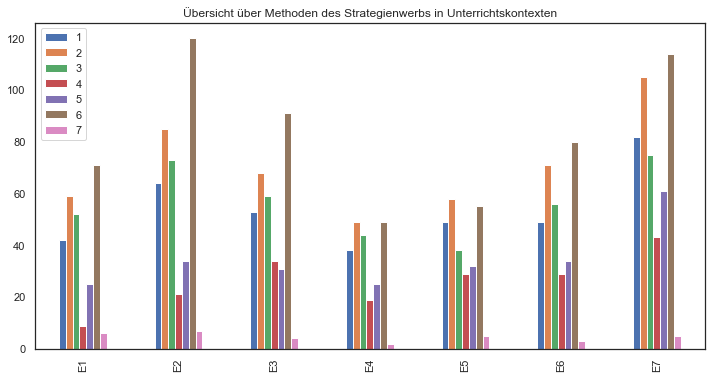

In [104]:
DF_Erwerb.T.plot(kind = 'bar', figsize = (12,6), title = 'Übersicht über Methoden des Strategienwerbs in Unterrichtskontexten');

In [105]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False)

B-Q2-8_3    66
B-Q2-8_2    40
B-Q2-8_4    39
B-Q2-8_1    31
B-Q2-8_5     6
dtype: int64

* (1)	He conocido estas estrategias en mi familia.
* (2)	He conocido estas estrategias hablando con amigos/as y conocidos/as.
* (3)	He conocido estas estrategias hablando con compañeros/as de clase.
* (4)	He conocido estas estrategias imitando hábitos de trabajo de compañeros/as de clase aventajados/as.
* (5)	Otros:

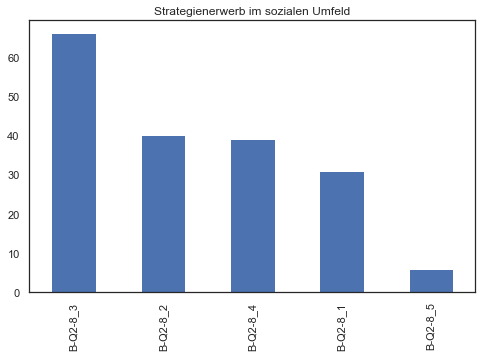

In [106]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Strategienerwerb im sozialen Umfeld");

In [107]:
Finished[Finished['B-Q2-8_5_TEXT'] != 0]['B-Q2-8_5_TEXT']

11     Actualmente mi primo vive en Alemánia y mi her...
24     Mi tía ha sido mi profesora de idiomas desde q...
128    He utilizado algunas estrategias de manera aut...
272                          creo eran positivas para mi
392    compañeros de clase extranjeros y la necesidad...
Name: B-Q2-8_5_TEXT, dtype: object

In [108]:
Finished['B-Q2-8_5_TEXT'][392]

'compañeros de clase extranjeros y la necesidad de hablar '

In [109]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False)

B-Q2-9_1    177
B-Q2-9_2    150
B-Q2-9_3     53
B-Q2-9_4     49
B-Q2-9_5     17
dtype: int64

* (1)	He desarrollado estas estrategias por mi cuenta durante el aprendizaje y el uso de idiomas, p. ej. leyendo textos difíciles.
* (2)	He probado diferentes cosas y me he dado cuenta de qué funciona mejor para mi.
* (3)	He aprendido estas estrategias con ayuda de páginas web o blogs.
* (4)	He aprendido estas estrategias con ayuda de libros.
* (5)	He aprendido estas estrategias con ayuda de otros materiales. (Opcional: Cuáles?)

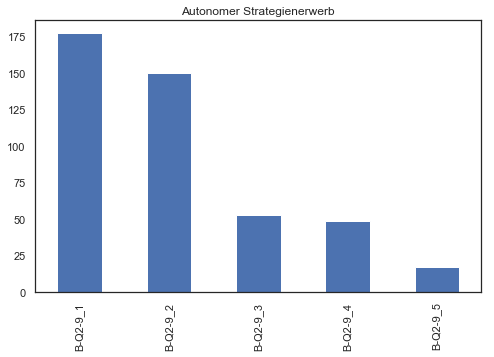

In [110]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Autonomer Strategienerwerb");

In [111]:
Finished[Finished['B-Q2-9_5_TEXT'] != 0]['B-Q2-9_5_TEXT']

44                                        YouTube, blogs
45     He aprendido estas estrategias pensando y util...
53     '-Libros, diccionarios, películas,audios,músic...
54                               Gracias a esta encuesta
61     Mi inteligencia, sentido común e instinto ling...
84                                         Series, Radio
86                                    youtube, instagram
87                     Los compañeros me han dado pistas
92                                          diccionarios
259                              Grámaticas, Duden, etc.
284    Videojuegos, música, en ambos leo lo que estoy...
372           Aplicaciones móviles para aprender idiomas
373                                Ver vídeos en YouTube
377                         Comparando con otros idiomas
Name: B-Q2-9_5_TEXT, dtype: object

##### Übersicht über Methoden des Strategienerwerbs in Unterrichtskontexten

In [112]:
Erwerb_U = []
for lst in erwerb1:
        Erwerb_U.append(Finished[Finished['IPAddress']!='2.154.100.40'][erwerb1[lst]].apply(pd.value_counts).astype(integer).iloc[1].sum())

In [113]:
Erwerb_U

[377, 495, 397, 184, 242, 580, 32]

In [114]:
Erwerb_U = pd.Series(Erwerb_U)

In [115]:
Erwerb_U.index += 1

In [116]:
Erwerb_U.sort_values(ascending = False)

6    580
2    495
3    397
1    377
5    242
4    184
7     32
dtype: int64

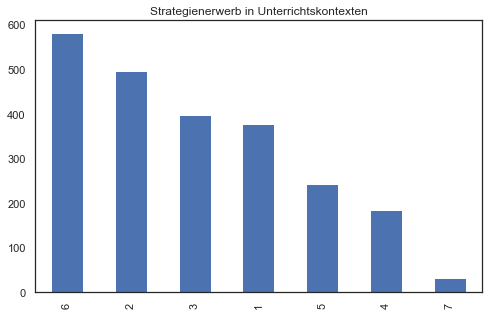

In [117]:
Erwerb_U.sort_values(ascending = False).plot(kind='bar', 
                                        figsize = (8,5), width = 0.5, 
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

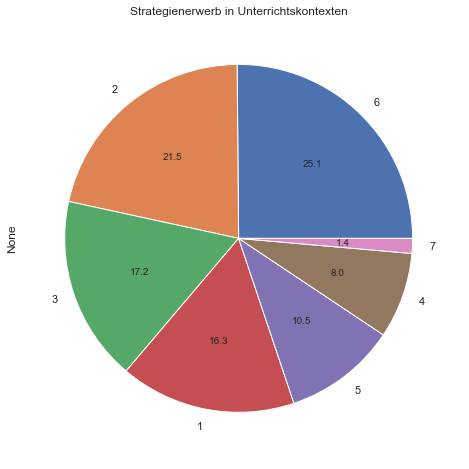

In [118]:
Erwerb_U.sort_values(ascending = False).plot(kind='pie', 
                                        figsize = (8,8), autopct='%.1f',
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

* (1)	Las estrategias se presentaron (y explicaron) en clase.
* (2)	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* (3)	Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* (4)	Se probaron y se compararon diferentes estrategias.
* (5)	Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* (6)	Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* (7)	Otros:

In [119]:
Stud_U.sort_values(ascending=False)

6    263
2    247
1    201
3    198
5    148
4    114
dtype: int64

#### B-Q3 + B-Q4 (Strategienwerb im Rahmen der Befragung)

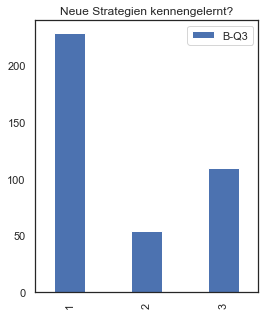

In [120]:
Finished['B-Q3'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien kennengelernt?");

(1) Ja
(2) Nein
(3) Vielleicht

In [121]:
Finished['B-Q3'].value_counts()

1    228
3    109
2     54
Name: B-Q3, dtype: int64

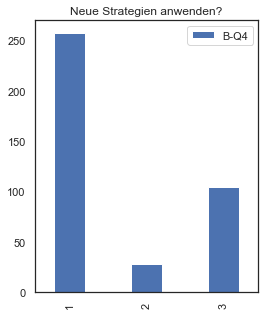

In [122]:
Finished['B-Q4'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien anwenden?");

In [123]:
Finished['B-Q4'].value_counts()

1    257
3    104
2     28
0      2
Name: B-Q4, dtype: int64

### Einstellung zu Erschließungsstrategien

#### C-Q1

In [124]:
Df_C1 = pd.DataFrame(Finished[Liste_C_Q1].describe())
Df_C1.T

,count,mean,std,min,25%,50%,75%,max
C-Q1_1,391.0,3.529412,0.884933,1.0,3.0,4.0,4.0,5.0
C-Q1_2,391.0,3.647059,1.108584,1.0,3.0,4.0,5.0,5.0
C-Q1_3,391.0,3.831202,1.077580,1.0,3.0,4.0,5.0,5.0
C-Q1_4,391.0,4.401535,0.828900,1.0,4.0,5.0,5.0,5.0
C-Q1_5,391.0,4.432225,0.757787,1.0,4.0,5.0,5.0,5.0
C-Q1_6,391.0,4.278772,0.845219,1.0,4.0,4.0,5.0,5.0
C-Q1_7,391.0,2.554987,1.170763,1.0,2.0,2.0,3.0,5.0


In [125]:
Daten[Liste_C_Q1].mode().T

,0
C-Q1_1,4
C-Q1_2,4
C-Q1_3,4
C-Q1_4,5
C-Q1_5,5
C-Q1_6,5
C-Q1_7,2


In [126]:
Daten[Liste_C_Q1].median().T

C-Q1_1    4.0
C-Q1_2    4.0
C-Q1_3    4.0
C-Q1_4    5.0
C-Q1_5    5.0
C-Q1_6    4.0
C-Q1_7    2.0
dtype: float64

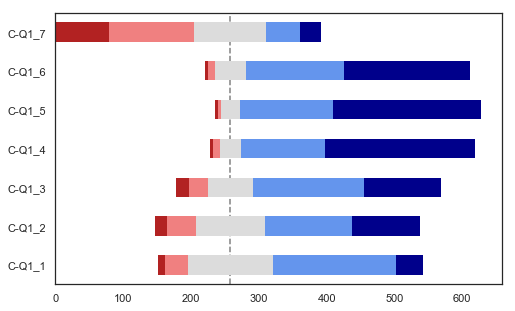

In [127]:
graf_likert(Finished,Liste_C_Q1,5)

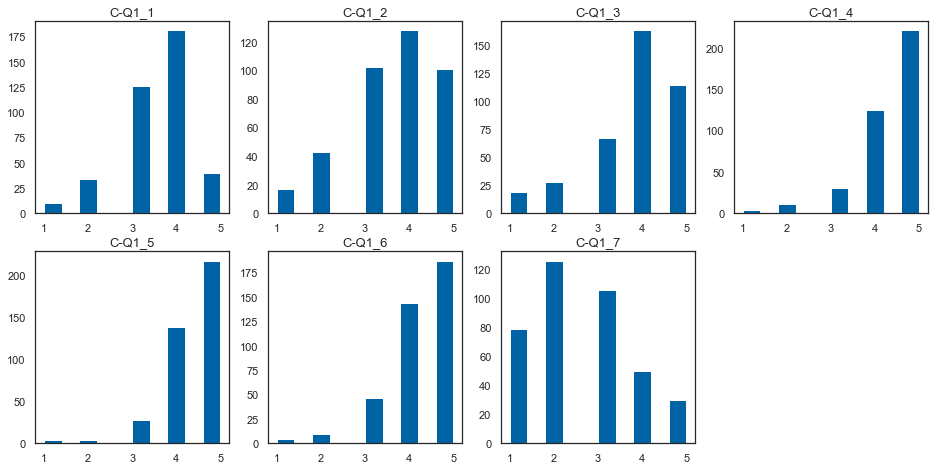

In [128]:
graf_hist(Finished,Liste_C_Q1,16,12,3,4)

1
Pienso que en alemán utilizo estas estrategias con éxito. 

2
Estas estrategias son un tema importante en mis clases de alemán.

3
Utilizo estas estrategias a menudo fuera del aula, p. ej. cuando leo textos en alemán en mi tiempo libre.

4
Estas estrategias son útiles para ampliar el vocabulario en alemán.

5
Estas estrategias son útiles para entender mejor textos en alemán.

6
Estas estrategias deberían explicarse y practicarse en las clases de alemán.

7
No hace falta aprender estas estrategias, ya que las usamos en cualquier caso de forma inconsciente. 


Korrelation in C-Q1:

In [129]:
Korr_C_Q1 = Daten[Liste_C_Q1].corr(method = 'spearman')
Korr_C_Q1 = Korr_C_Q1.style.applymap(lambda x: 'background-color : salmon' if abs(x) > 0.5 
                           else 'background-color: lightsalmon' if abs(x) > 0.3 and abs(x) <= 0.5
                           else 'background-color: peachpuff' if abs(x) > 0.1 and abs(x) <= 0.3
                           else 'background-color : white')
Korr_C_Q1

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
C-Q1_1,1,0.18886,0.474697,0.339093,0.379286,0.16494,0.132772
C-Q1_2,0.18886,1,0.115184,0.276655,0.328676,0.306114,-0.0428222
C-Q1_3,0.474697,0.115184,1,0.26301,0.38752,0.123883,0.116588
C-Q1_4,0.339093,0.276655,0.26301,1,0.573939,0.325098,-0.14857
C-Q1_5,0.379286,0.328676,0.38752,0.573939,1,0.348164,-0.0489606
C-Q1_6,0.16494,0.306114,0.123883,0.325098,0.348164,1,-0.158655
C-Q1_7,0.132772,-0.0428222,0.116588,-0.14857,-0.0489606,-0.158655,1


In [130]:
corr, pv = stats.spearmanr(Daten[Liste_C_Q1])
df = pd.DataFrame(pv)
df.columns = Korr_C_Q1.columns
df.index = Korr_C_Q1.index
df = df.style.applymap(lambda x: 'background-color : salmon' if abs(x) < 0.01 
                           else 'background-color: lightsalmon' if abs(x) < 0.05 and abs(x) >= 0.01
                           else 'background-color : white')
df

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
C-Q1_1,0,0.000142143,6.29572e-24,3.01745e-12,3.62147e-15,0.000915314,0.00776205
C-Q1_2,0.000142143,0,0.0210523,1.77055e-08,1.48246e-11,3.80698e-10,0.392424
C-Q1_3,6.29572e-24,0.0210523,0,9.05603e-08,8.10019e-16,0.0130435,0.0195249
C-Q1_4,3.01745e-12,1.77055e-08,9.05603e-08,0,1.65518e-36,2.52597e-11,0.00286007
C-Q1_5,3.62147e-15,1.48246e-11,8.10019e-16,1.65518e-36,0,7.18088e-13,0.328093
C-Q1_6,0.000915314,3.80698e-10,0.0130435,2.52597e-11,7.18088e-13,0,0.00143582
C-Q1_7,0.00776205,0.392424,0.0195249,0.00286007,0.328093,0.00143582,0
